In [1]:
import zipfile
import os

# 압축 해제할 zip 파일 경로
zip_file_path = 'f_youtube_dataset.zip'  # 실제 zip 파일 이름으로 변경하세요.

# 압축을 풀 폴더 경로
extract_dir = 'youtube_dataset'

# 압축 해제 디렉토리가 없는 경우 생성
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# zip 파일 열기 및 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'압축 해제 완료: {extract_dir}')

압축 해제 완료: youtube_dataset


In [1]:
import os

extract_dir = 'youtube_dataset/f_youtube_dataset'

# 압축 해제된 파일 목록 확인
files = os.listdir(extract_dir)
print(f'압축 해제된 파일 수: {len(files)}')
print('파일 목록:', files)


압축 해제된 파일 수: 54
파일 목록: ['processed_images_11.npy', 'processed_landmarks_6.npy', 'processed_landmarks_17.npy', 'processed_landmarks_23.npy', 'processed_landmarks_24.npy', 'processed_images_14.npy', 'processed_landmarks_16.npy', 'processed_images_18.npy', 'processed_landmarks_0.npy', 'processed_landmarks_1.npy', 'processed_landmarks_21.npy', 'processed_images_7.npy', 'processed_landmarks_18.npy', 'processed_landmarks_25.npy', 'processed_landmarks_10.npy', 'processed_images_12.npy', 'processed_landmarks_8.npy', 'processed_landmarks_14.npy', 'processed_landmarks_2.npy', 'processed_images_23.npy', 'processed_images_3.npy', 'processed_landmarks_26.npy', 'processed_images_24.npy', 'processed_landmarks_19.npy', 'processed_images_10.npy', 'processed_images_15.npy', 'processed_images_13.npy', 'processed_landmarks_13.npy', 'processed_images_4.npy', 'processed_images_8.npy', 'processed_images_22.npy', 'processed_landmarks_9.npy', 'processed_images_16.npy', 'processed_landmarks_7.npy', 'processed_l

In [1]:
import numpy as np
import glob
import os
from tqdm import tqdm

extract_dir = 'youtube_dataset/f_youtube_dataset'

# 이미지 파일과 키포인트 파일 경로 가져오기
image_files = sorted(glob.glob(os.path.join(extract_dir, 'processed_images_*.npy')))
landmark_files = sorted(glob.glob(os.path.join(extract_dir, 'processed_landmarks_*.npy')))

# 각 파일의 개수 확인
print(f'이미지 파일 수: {len(image_files)}')
print(f'키포인트 파일 수: {len(landmark_files)}')

# 목표 청크 크기
target_chunk_size = 80000  # 청크 당 데이터 수 (필요에 따라 조정 가능)
current_images = []
current_landmarks = []
chunk_index = 0

for img_file, lm_file in tqdm(zip(image_files, landmark_files), total=len(image_files), desc='파일 처리 중'):
    # .npy 파일 로드
    images_chunk = np.load(img_file)
    landmarks_chunk = np.load(lm_file)
    
    # 리스트에 추가
    current_images.append(images_chunk)
    current_landmarks.append(landmarks_chunk)
    
    # 현재까지의 데이터 개수
    total_current = sum([chunk.shape[0] for chunk in current_images])
    
    # 목표 청크 크기에 도달했는지 확인
    if total_current >= target_chunk_size:
        # 데이터 결합
        combined_images = np.concatenate(current_images, axis=0)
        combined_landmarks = np.concatenate(current_landmarks, axis=0)
        
        # 데이터 섞기
        indices = np.arange(combined_images.shape[0])
        np.random.shuffle(indices)
        combined_images = combined_images[indices]
        combined_landmarks = combined_landmarks[indices]
        
        # 저장
        np.save(f'shuffled_images_chunk_{chunk_index}.npy', combined_images)
        np.save(f'shuffled_landmarks_chunk_{chunk_index}.npy', combined_landmarks)
        print(f'청크 {chunk_index} 저장 완료: {combined_images.shape[0]}개 이미지')
        
        # 리스트 초기화
        current_images = []
        current_landmarks = []
        chunk_index += 1

# 남은 데이터 저장
if current_images:
    combined_images = np.concatenate(current_images, axis=0)
    combined_landmarks = np.concatenate(current_landmarks, axis=0)
    
    # 데이터 섞기
    indices = np.arange(combined_images.shape[0])
    np.random.shuffle(indices)
    combined_images = combined_images[indices]
    combined_landmarks = combined_landmarks[indices]
    
    # 저장
    np.save(f'shuffled_images_chunk_{chunk_index}.npy', combined_images)
    np.save(f'shuffled_landmarks_chunk_{chunk_index}.npy', combined_landmarks)
    print(f'청크 {chunk_index} 저장 완료: {combined_images.shape[0]}개 이미지')

이미지 파일 수: 27
키포인트 파일 수: 27


파일 처리 중:  30%|██▉       | 8/27 [02:21<10:22, 32.78s/it]

청크 0 저장 완료: 80000개 이미지


파일 처리 중:  59%|█████▉    | 16/27 [04:42<05:54, 32.27s/it]

청크 1 저장 완료: 80000개 이미지


파일 처리 중:  93%|█████████▎| 25/27 [07:15<01:09, 34.95s/it]

청크 2 저장 완료: 80399개 이미지


파일 처리 중: 100%|██████████| 27/27 [07:32<00:00, 16.74s/it]


청크 3 저장 완료: 20000개 이미지


In [2]:
import os
import glob

# 저장된 청크 파일 경로
image_chunks = sorted(glob.glob('shuffled_images_chunk_*.npy'))
landmark_chunks = sorted(glob.glob('shuffled_landmarks_chunk_*.npy'))

print(f'저장된 이미지 청크 수: {len(image_chunks)}')
print(f'저장된 키포인트 청크 수: {len(landmark_chunks)}')

저장된 이미지 청크 수: 4
저장된 키포인트 청크 수: 4


이미지 배열 형태: (80000, 224, 224, 3)
키포인트 배열 형태: (80000, 68, 2)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


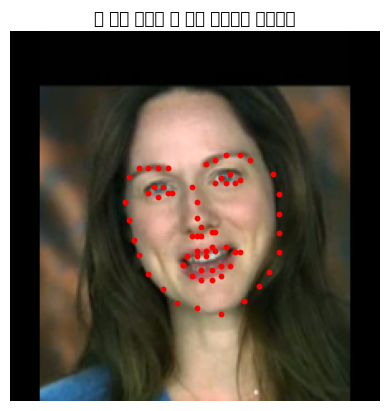

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 첫 번째 청크 로드
images = np.load('shuffled_images_chunk_0.npy')
landmarks = np.load('shuffled_landmarks_chunk_0.npy')

print('이미지 배열 형태:', images.shape)
print('키포인트 배열 형태:', landmarks.shape)

# 첫 번째 이미지와 키포인트 시각화
image = images[0]
lm = landmarks[0]

plt.imshow(image.astype(np.uint8))
plt.scatter(lm[:, 0], lm[:, 1], c='r', s=10)
plt.title('첫 번째 청크의 첫 번째 이미지와 키포인트')
plt.axis('off')
plt.show()

In [6]:
import numpy as np
import glob
import os
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

# 파일들이 현재 디렉토리에 있다고 가정
current_dir = '.'  # 또는 파일들이 있는 디렉토리 경로로 수정

# 이미지 파일과 키포인트 파일 경로 가져오기
image_chunks = sorted(glob.glob(os.path.join(current_dir, 'shuffled_images_chunk_*.npy')))
landmark_chunks = sorted(glob.glob(os.path.join(current_dir, 'shuffled_landmarks_chunk_*.npy')))

# 각 파일의 개수 확인
print(f'이미지 청크 파일 수: {len(image_chunks)}')
print(f'키포인트 청크 파일 수: {len(landmark_chunks)}')

# 파일 목록 출력
print("\n이미지 청크 파일 목록:")
for file in image_chunks:
    print(file)

print("\n키포인트 청크 파일 목록:")
for file in landmark_chunks:
    print(file)


이미지 청크 파일 수: 4
키포인트 청크 파일 수: 4

이미지 청크 파일 목록:
./shuffled_images_chunk_0.npy
./shuffled_images_chunk_1.npy
./shuffled_images_chunk_2.npy
./shuffled_images_chunk_3.npy

키포인트 청크 파일 목록:
./shuffled_landmarks_chunk_0.npy
./shuffled_landmarks_chunk_1.npy
./shuffled_landmarks_chunk_2.npy
./shuffled_landmarks_chunk_3.npy


In [7]:
for img_file, lm_file in zip(image_chunks, landmark_chunks):
    images = np.load(img_file)
    landmarks = np.load(lm_file)
    
    print(f'\n청크 파일: {img_file}')
    print(f'이미지 데이터 형태: {images.shape}')        # 예상: (80000, 224, 224, 3)
    print(f'키포인트 데이터 형태: {landmarks.shape}')  # 예상: (80000, 68, 2)')
    
    # 빈 청크 파일 확인
    if images.size == 0 or landmarks.size == 0:
        print(f'빈 청크 발견: {img_file}, {lm_file}')
    else:
        print(f'{img_file} 로드 완료: {images.shape[0]}개 이미지')
        print(f'{lm_file} 로드 완료: {landmarks.shape[0]}개 키포인트')



청크 파일: ./shuffled_images_chunk_0.npy
이미지 데이터 형태: (80000, 224, 224, 3)
키포인트 데이터 형태: (80000, 68, 2)
./shuffled_images_chunk_0.npy 로드 완료: 80000개 이미지
./shuffled_landmarks_chunk_0.npy 로드 완료: 80000개 키포인트

청크 파일: ./shuffled_images_chunk_1.npy
이미지 데이터 형태: (80000, 224, 224, 3)
키포인트 데이터 형태: (80000, 68, 2)
./shuffled_images_chunk_1.npy 로드 완료: 80000개 이미지
./shuffled_landmarks_chunk_1.npy 로드 완료: 80000개 키포인트

청크 파일: ./shuffled_images_chunk_2.npy
이미지 데이터 형태: (80399, 224, 224, 3)
키포인트 데이터 형태: (80399, 68, 2)
./shuffled_images_chunk_2.npy 로드 완료: 80399개 이미지
./shuffled_landmarks_chunk_2.npy 로드 완료: 80399개 키포인트

청크 파일: ./shuffled_images_chunk_3.npy
이미지 데이터 형태: (20000, 224, 224, 3)
키포인트 데이터 형태: (20000, 68, 2)
./shuffled_images_chunk_3.npy 로드 완료: 20000개 이미지
./shuffled_landmarks_chunk_3.npy 로드 완료: 20000개 키포인트
